We will learn genetic algorithms in this; and we will write an algorirthm for linear regression for least MAE

https://youtu.be/uQj5UNhCPuo?feature=shared


Watch this video first which will help you understand what genetic algorithms are

# Genetic Algorithms

Genetic Algorithms (GAs) are optimization and search techniques inspired by the principles of natural selection and evolution. They are used to solve problems that are difficult or infeasible to address with conventional methods. GAs simulate the process of evolution to evolve solutions over successive iterations.

## Key Concepts in Genetic Algorithms
1. **Population**: A set of candidate solutions to the problem.
2. **Chromosome**: A representation of a candidate solution, often encoded as a string (binary, numeric, or symbolic).
3. **Genes**: The individual components or parameters of a chromosome.
4. **Fitness Function**: A measure of how good a solution is for the given problem.
5. **Selection**: Choosing parent solutions from the population based on their fitness.
6. **Crossover (Recombination)**: Combining parts of two parent chromosomes to create offspring.
7. **Mutation**: Randomly altering genes in a chromosome to maintain genetic diversity.
8. **Elitism**: Retaining the best solutions from one generation to the next to preserve quality.

## How Genetic Algorithms Work
1. **Initialization**: Generate an initial population of candidate solutions randomly or based on some heuristics.
2. **Evaluation**: Assess the fitness of each candidate solution using the fitness function.
3. **Selection**: Choose the most fit individuals for reproduction.
4. **Reproduction**:
   - **Crossover**: Create new individuals by combining features of selected parents.
   - **Mutation**: Introduce small random changes in offspring.
5. **Replacement**: Form a new generation by replacing some or all of the old population with the new one.
6. **Iteration**: Repeat the process until a stopping condition is met (e.g., a satisfactory fitness level or a maximum number of generations).

## Applications of Genetic Algorithms
- **Optimization Problems**: Finding optimal solutions for mathematical, engineering, or financial problems.
- **Machine Learning**: Feature selection, hyperparameter tuning, and neural architecture search.
- **Scheduling**: Solving complex scheduling problems, such as in manufacturing or airline crew assignments.
- **Game Design**: Developing strategies or AI for games.
- **Bioinformatics**: Sequence alignment, protein structure prediction, etc.

Genetic algorithms are particularly useful for problems with large search spaces, non-linear relationships, or multiple conflicting objectives.


In [671]:
import random
import numpy as np
import matplotlib.pyplot as plt

In [672]:
# Constants
PARAMETER = 10
LINEAR_REGRESSION_ERROR_RANGE = 3
ERROR_RANGE = 1.0001
MUTATION_RATE = 0.1
NUM_POINTS = 45
NUM_ELITES = 2  # Number of best lines to retain across generations

In [673]:

# Function 1: Generate random points along a line with added noise
# This function is already implemented for you.

def generate_random_points(num_points, slope, intercept):
    noise = np.random.normal(0, LINEAR_REGRESSION_ERROR_RANGE, num_points)
    x_coords = np.random.uniform(-PARAMETER, PARAMETER, num_points)
    y_coords = slope * x_coords + intercept + noise
    return np.column_stack((x_coords, y_coords))


In [674]:

# Function 2: Generate random lines by connecting two random points
'''
Instructions:
- Write a function that generates a list of random lines.
- Each line is represented as a list with a slope and intercept.
- Both slope and intercept should be random floats in the range [-PARAMETER, PARAMETER].
'''

def generate_random_lines(num_lines):
    rlines = []
    for i in range(num_lines):
        m = random.uniform(-PARAMETER, PARAMETER)
        c = random.uniform(-PARAMETER, PARAMETER)
        rlines.append([m, c])
    return np.array(rlines)


In [675]:

# Function 3: Measure the error (badness) of all lines using vectorized operations
'''
Instructions:
- Write a function that calculates how well a line fits the points.
- Use the formula: error = sum((predicted_y - actual_y) ** 2) for each line.
- Use NumPy for vectorized calculations.
'''

def calculate_errors(lines, points):
    actual_y = points[:, 1]
    err=[]
    for i, (m,c) in enumerate(lines):
        predicted_y = m*points[:, 0] + c
        error = np.sum((predicted_y - actual_y) ** 2)
        err.append(error)
    return np.array(err)

In [676]:

# Function 4: Enhanced mutation function
'''
Instructions:
- Write a function that randomly mutates a line (its slope and intercept).
- Use the MUTATION_RATE to decide whether to mutate each parameter.
- Mutate by adding a small random value proportional to the current value.
'''

def mutate(line, mutation_rate=MUTATION_RATE):
    mutated_line = []
    for i in range(2):
        if random.random() < mutation_rate:
            mutated_line.append(line[i] + random.random() * line[i])
        else:
            mutated_line.append(line[i])
    return np.array(mutated_line)


In [677]:

# Function 5: Create the next generation using crossover, mutation, and elitism
'''
Instructions:
- Write a function to create the next generation of lines.
- Retain the best `num_elites` lines as is.
- Perform crossover by mixing the slope of one parent with the intercept of another.
- Apply mutations to the offspring.
- Ensure the next generation has the same number of lines as the current generation.
'''

def create_next_generation(lines, points, num_elites=NUM_ELITES):
    new_lines = []
    errors= calculate_errors(lines, points)
    sorted_errors = np.argsort(errors)

    for i in range(num_elites):                          # Elitism
        new_lines.append(lines[sorted_errors[i]])

    # print(lines)


    for i in range (0, len(lines), 2):           # Crossover- 2 parents and 2 offsprings
        if len(new_lines)==len(lines):
            break
        parent1 = lines[sorted_errors[i]]
        parent2 = lines[sorted_errors[i+1]]
        offspring1 = [parent1[0], parent2[1]]
        offspring2 = [parent2[0], parent1[1]]
        offspring1 = mutate(offspring1)
        offspring2 = mutate(offspring2)
        new_lines.append(offspring1)
        new_lines.append(offspring2)
    
    return np.array(new_lines)

In [678]:

# Function 6: Visualization function
# This has been implemented for you

def plot_progress(points, actual_line, predicted_line, generation):
    x = points[:, 0]
    y = points[:, 1]

    plt.figure(figsize=(8, 6))
    plt.scatter(x, y, label="Data Points", color="blue")
    
    x_fit = np.linspace(min(x), max(x), 100)
    y_actual = actual_line[0] * x_fit + actual_line[1]
    y_predicted = predicted_line[0] * x_fit + predicted_line[1]

    plt.plot(x_fit, y_actual, label="Actual Line", color="green", linewidth=2)
    plt.plot(x_fit, y_predicted, label=f"Predicted Line (Gen {generation})", color="red", linestyle="dashed")
    
    plt.xlabel("X")
    plt.ylabel("Y")
    plt.title("Genetic Algorithm Progress")
    plt.legend()
    plt.show()
    

In [679]:
'''
Instructions:
- Write the main loop of the genetic algorithm.
- Initialize a generation of random lines.
- Iterate through generations, calculating errors and selecting the best line.
- Break the loop if the best error is within the acceptable range (defined by ERROR_RANGE).
- Use the `plot_progress` function to visualize progress in each generation.
'''

def genetic_algorithm():
    # Generate test data
    num_points = NUM_POINTS
    true_slope = random.uniform(-PARAMETER, PARAMETER)
    true_intercept = random.uniform(-PARAMETER, PARAMETER)
    test_points = generate_random_points(num_points, true_slope, true_intercept)
    actual_line = [true_slope, true_intercept]
    
    
    generation=0
    gen= generate_random_lines(10)
    while True:
        errors= calculate_errors(gen, test_points)
        best_line= gen[np.argmin(errors)]
        best_error= np.min(errors)
        # if generation==0:
        #         best_error1= best_error
        if generation!=0 and (best_error < ERROR_RANGE or  best_error1<= best_error) :
            print(prev_gen)
            print(gen)
            break
        # if generation%10==0:
        plot_progress(test_points, actual_line, best_line, generation)
        print(f"Generation {generation} - Best Error: {best_error}")
            # if best_error1==best_error and generation!=0:
            #     break
            # if generation!=0:
            #     best_error1= best_error 
        prev_gen= gen
        gen= create_next_generation(prev_gen, test_points)
        generation+=1
        best_error1= best_error
    print("Actual Line:", actual_line)
    print("Best Line Found:", best_line)
    return None
    


    

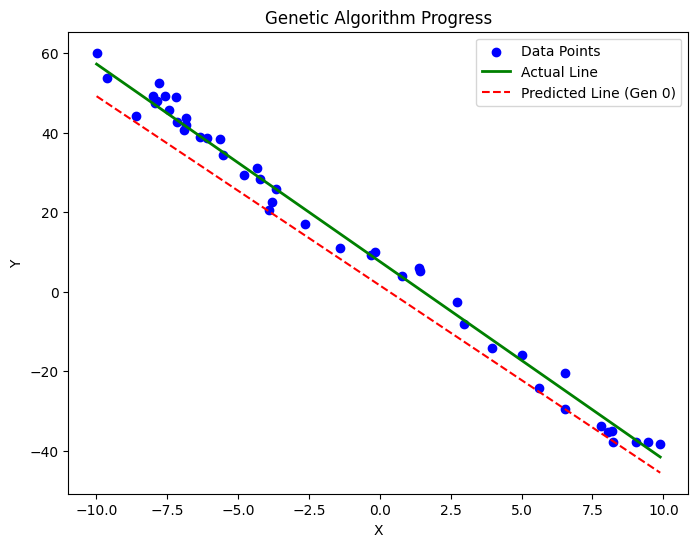

Generation 0 - Best Error: 2396.2149621787494


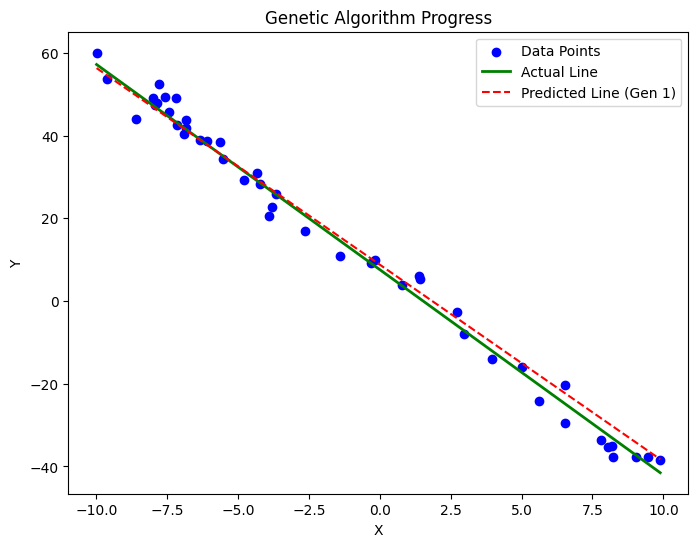

Generation 1 - Best Error: 591.2107468155174
[[-4.76078752  1.59469318]
 [-6.95534017  8.79951361]
 [-4.76078752  8.79951361]
 [-6.95534017  2.62714925]
 [-9.05433848 -3.31390702]
 [-9.4035832   0.39948749]
 [-1.96974365 -3.11317318]
 [-1.24317292 -7.92187895]
 [ 0.52275007 -9.8302163 ]
 [-0.39780831  9.48140916]]
[[ -4.76078752   8.79951361]
 [ -4.76078752   1.59469318]
 [ -4.76078752   1.59469318]
 [ -4.76078752   8.79951361]
 [ -6.95534017   8.79951361]
 [ -6.95534017   2.62714925]
 [ -1.96974365  -3.31390702]
 [ -9.05433848  -3.11317318]
 [-15.48061507   9.48140916]
 [ -0.39780831   0.39948749]]
Actual Line: [-4.9682076810285025, 7.597160693033096]
Best Line Found: [-4.76078752  8.79951361]


In [680]:

#Run the algorithm
genetic_algorithm()